# Objectives:

a. Perform an exploratory investigation of the data. **Identify one or two trends in the data** that are interesting from a data perspective.

    -Do the trends you observe have any effect on how you would build your **ranking feature?**
    -Are there any **inconsistencies in the data** that could have any effect on how you would build your ranking feature?  
    -How would you **communicate** these findings to a non-technical project manager?

b. How much web traffic are users' profiles receiving from internal and external sources? Is it reasonable to include both data sources in the product feature?

c. Generate a ranking for profile views. How would you present the profile view data for a "Rank for Profile Views" feature?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

import sklearn as sk

# Data

In [2]:
users = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/XU-eVWAH43QNpS0y5YfYow/users.csv')
user_profile_urls = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/ZJP4_K3y3b-Mh7FvwjLhUA/user_profile_urls.csv')
titles = pd.DataFrame(np.array([[2, 'Assistant Professor'], [1, 'Full professor'], [6, 'Other'], [3, 'Postdoctoral assistant'], [5, 'Student']]), columns=['id', 'title'])
titles['id'] = titles['id'].astype(int)
internal_profile_views = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/P0nIDnNJq8dA-l-E4w4QgQ/internal_profile_views.csv')
external_profile_views = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/tE7PDLQbw_chlLTwRUI_Cw/external_profile_views.csv')

In [3]:
external_profile_views.head()

,id,public_profile_url,unique_PageViews
0,1,/pub/david-brown-ms,1
1,2,/pub/julie-fremont-ms,1
2,3,/cv/tara-cutler,5
3,4,/pub/michael-morrell-ms,14
4,5,/cv/daniel-paterniti,1


In [4]:
external_profile_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335636 entries, 0 to 335635
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  335636 non-null  int64 
 1   public_profile_url  335636 non-null  object
 2   unique_PageViews    335636 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.7+ MB


In [5]:
# external_profile_views.to_csv('external_profile_views.csv', index=False)

The product manager has some questions on the data and is looking to you for some insight. Please provide your answer (and any applicable SQL queries you used to arrive at the answer):

1. What is the average age of users by region?

```
SELECT region
, ROUND(AVG(age)) AS average_age
FROM doximity.users
GROUP BY 1
ORDER BY 2 DESC
```
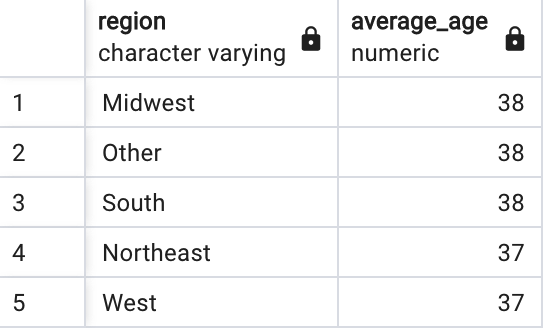

1. Could you provide a breakdown of user title and number of user counts associated with each title?

```
SELECT title
, COUNT(*) AS title_count
FROM doximity.user_titles
JOIN doximity.users
ON doximity.user_titles.id = doximity.users.title_id
GROUP BY 1
ORDER BY 2 DESC
```
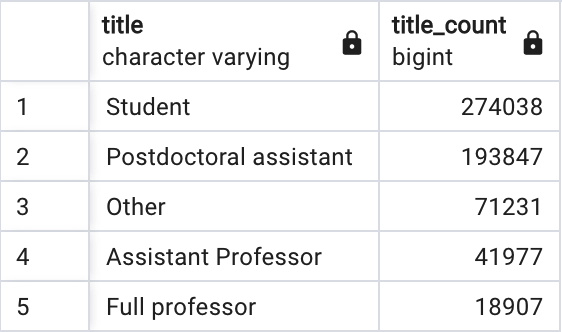

1. Who is the top viewed user, based on internal profile views?

```
SELECT viewed_user_id
, COUNT(*) AS internal_profile_views
FROM doximity.internal_profile_views
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1
```
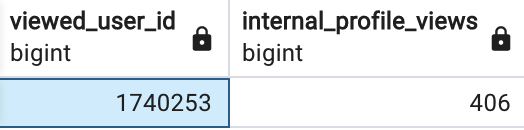

1. Can you provide a ranked list of the top 10 most viewed users based on internal profile views, supplemented with data from the user table?

```
WITH views AS (
SELECT viewed_user_id
, firstname
, lastname
, age
, region
, title_id
, COUNT(*) AS view_count
FROM doximity.internal_profile_views AS ipv
JOIN doximity.users AS u
ON ipv.viewed_user_id = u.id
GROUP BY 1, 2, 3, 4, 5, 6
)

, prof_view_rank AS (
SELECT *
, RANK() OVER (ORDER BY view_count DESC) AS view_rank
FROM views
)

SELECT viewed_user_id
, firstname
, lastname
, age
, region
, title_id
, view_count
, view_rank
FROM prof_view_rank
WHERE view_rank <= 10
```
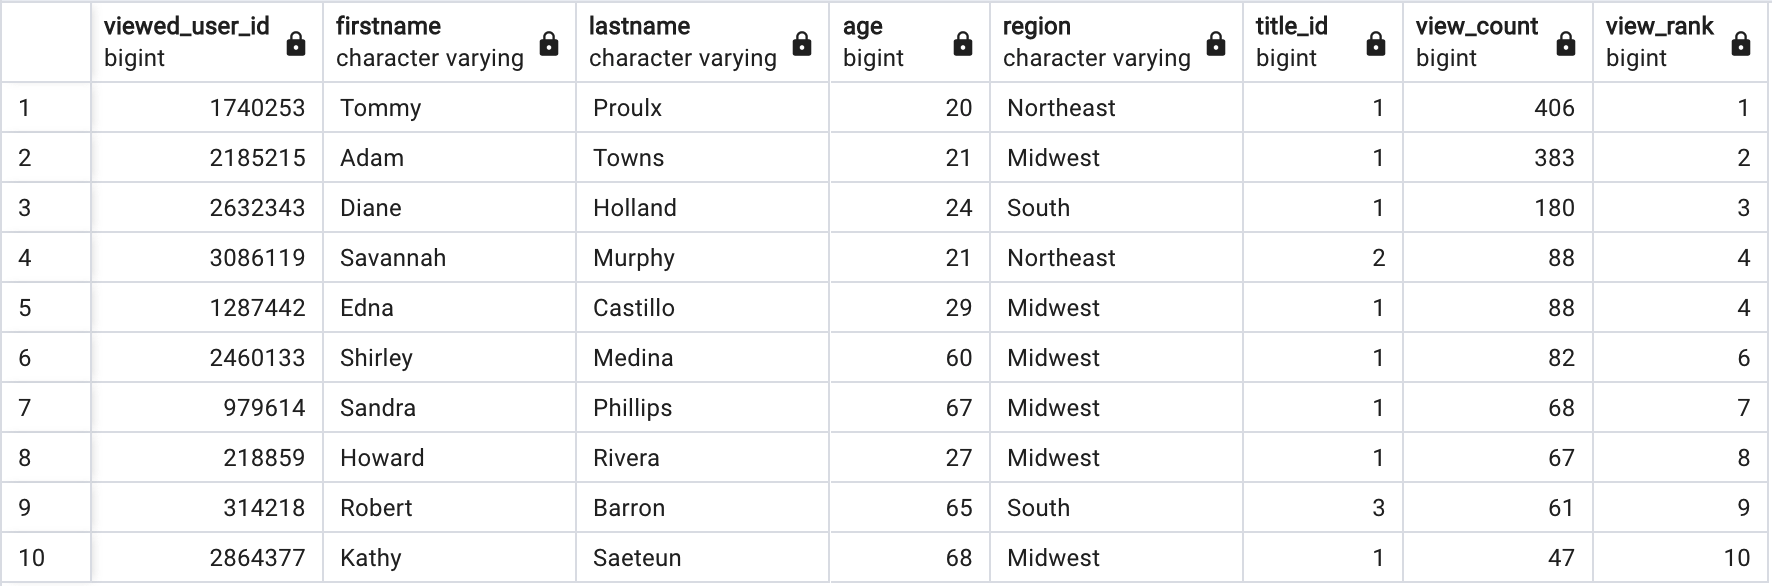

1. Which region gets the most viewed users (based on internal profile views)?

```
WITH views AS (
SELECT viewed_user_id
, firstname
, lastname
, age
, region
, title_id
, COUNT(*) AS view_count
FROM doximity.internal_profile_views AS ipv
JOIN doximity.users AS u
ON ipv.viewed_user_id = u.id
GROUP BY 1, 2, 3, 4, 5, 6
)

, prof_view_rank AS (
SELECT *
, RANK() OVER (ORDER BY view_count DESC) AS view_rank
FROM views
)

SELECT region
, COUNT(*) AS region_count
FROM prof_view_rank
WHERE view_rank <= 10
GROUP BY 1
ORDER BY 2 DESC			
```
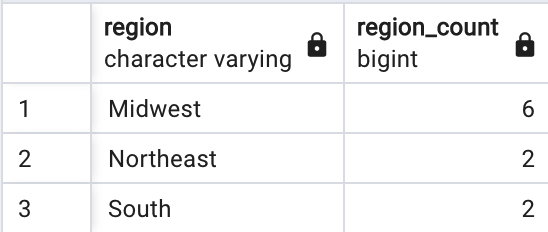